# CNN으로 전 세계 자연경관 이미지 분류하기
이미지 데이터 출처 :  https://www.kaggle.com/puneet6060/intel-image-classification?

이 데이터에는 6 개 카테고리에 분포 된 150x150 크기의 약 25k 이미지가 포함되어 있습니다.

{ '건물(buildings)'-> 0,
'숲(forest)'-> 1,
'빙하(glacier)'-> 2,
'산(mountain)'-> 3,
'바다(sea)'-> 4,
'거리(street)'-> 5}

In [2]:
# 라이브러리 불러오기

from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob

In [3]:
# 사용한 라이브러리와 파이썬 버전 표시하기

print('TensorFlow : %s'%(tf.__version__))
!python --version

TensorFlow : 2.3.0
Python 3.7.4


## 이미지 변환하기

In [4]:
# 이미지가 있는 폴더의 경로 지정하기 (이미지의 카테고리를 폴더 별로 분리해서 저장한다.)

data_dir = "D:/data/kaggle_seg/seg_train"

In [5]:
# 분류 하려는 이미지의 카테고리 이름 지정하기

categories = ['buildings','forest','glacier','mountain','sea','street']    # 6개의 카테고리 -> [0,0,0,0,0,0]

# 카테고리의 갯수 확인하기
nb_class = len(categories)
nb_class

6

In [6]:
# 이미지 사이즈를 균일하게 지정하기

image_w = 64    # 이미지에 대한 너비
image_h = 64    # 이미지에 대한 높이
pixels = image_w * image_h * 3    # RGB 3원색이기 때문에 3

In [11]:
# 이미지마다 원핫(one-hot) 인코딩을 하기 -> 컴퓨터가 작업할 수 있도록 배열(array)값으로 바꿔준다.

X = []
Y = []

for idx, jh in enumerate(categories):    # 폴더에 있는 이미지 전부 읽어 들이기, enumerate : 순서가 있는 자료형(리스트,튜플, 문자열)의 인덱스와 값을 반환해준다. 
	label = [0 for i in range(nb_class)]    # 레이블 지정 : 6개의 카테고리 -> [0,0,0,0,0,0]
	label[idx] = 1
	image_dir = data_dir+"/"+jh
	files = glob.glob(image_dir+"/*.jpg")    # 이미지 확장자가 jpg로 되어있으면 전부 가져온다.
	print(files)
	for i, f in enumerate(files):    # 읽어 온 이미지 전부 이미지 사이즈 64X64, 배열(array)로 변환하기
		img = Image.open(f)
		img = img.convert("RGB")
		img = img.resize((image_w,image_h))
		data = np.asarray(img)
		X.append(data)    # X = 배열(array)로 변환한 이미지 저장
		Y.append(label)    # Y = 레이블 저장 [1,0,0,0,0,0]부터 [0,0,0,0,0,1]까지
# [1,0,0,0,0,0] 이면 '건물(buildings)', [0,1,0,0,0,0]이면 '숲(forest)' ... 이런식

['D:/data/kaggle_seg/seg_train/buildings\\0.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10006.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\1001.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10014.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10018.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10029.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10032.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10056.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\1009.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10113.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\1012.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10126.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10144.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10151.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10161.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10165.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10176.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10184.jpg', 'D:/data/kaggle_seg/seg_train/buildings\\10185.jpg',

['D:/data/kaggle_seg/seg_train/forest\\10007.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10010.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10020.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10030.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10037.jpg', 'D:/data/kaggle_seg/seg_train/forest\\1004.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10050.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10051.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10074.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10078.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10086.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10088.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10089.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10098.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10103.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10116.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10121.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10123.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10135.jpg', 'D:/data/kaggle_seg/seg_train/forest\\10138.jpg', 

['D:/data/kaggle_seg/seg_train/glacier\\10.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\100.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10003.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10009.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10011.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\1002.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10024.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10025.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10033.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10055.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10064.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10077.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10094.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\1010.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10104.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10110.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10117.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\1013.jpg', 'D:/data/kaggle_seg/seg_train/glacier\\10130.jpg', 'D:/data/kaggle_seg/seg_train/glacier\

['D:/data/kaggle_seg/seg_train/mountain\\10000.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10001.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10002.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10008.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10023.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10026.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10027.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10028.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10031.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10035.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10044.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10046.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10049.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10057.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10058.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\1006.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10067.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10075.jpg', 'D:/data/kaggle_seg/seg_train/mountain\\10081.jpg', 'D:/data/kag

['D:/data/kaggle_seg/seg_train/sea\\1.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10016.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10041.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10053.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10061.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10068.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10071.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10080.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10087.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10093.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10095.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10108.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10114.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10115.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10120.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10122.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10128.jpg', 'D:/data/kaggle_seg/seg_train/sea\\1014.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10143.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10150.jpg', 'D:/data/kaggle_seg/seg_train/sea\\10177.jpg', 'D:/data/kaggle_s

['D:/data/kaggle_seg/seg_train/street\\1000.jpg', 'D:/data/kaggle_seg/seg_train/street\\10015.jpg', 'D:/data/kaggle_seg/seg_train/street\\10019.jpg', 'D:/data/kaggle_seg/seg_train/street\\10022.jpg', 'D:/data/kaggle_seg/seg_train/street\\10036.jpg', 'D:/data/kaggle_seg/seg_train/street\\10039.jpg', 'D:/data/kaggle_seg/seg_train/street\\10042.jpg', 'D:/data/kaggle_seg/seg_train/street\\1005.jpg', 'D:/data/kaggle_seg/seg_train/street\\10062.jpg', 'D:/data/kaggle_seg/seg_train/street\\10063.jpg', 'D:/data/kaggle_seg/seg_train/street\\10065.jpg', 'D:/data/kaggle_seg/seg_train/street\\1007.jpg', 'D:/data/kaggle_seg/seg_train/street\\10070.jpg', 'D:/data/kaggle_seg/seg_train/street\\10072.jpg', 'D:/data/kaggle_seg/seg_train/street\\10076.jpg', 'D:/data/kaggle_seg/seg_train/street\\10084.jpg', 'D:/data/kaggle_seg/seg_train/street\\10085.jpg', 'D:/data/kaggle_seg/seg_train/street\\10091.jpg', 'D:/data/kaggle_seg/seg_train/street\\10097.jpg', 'D:/data/kaggle_seg/seg_train/street\\10099.jpg', 'D

In [13]:
# X를 실제 array로 변환하는 작업 (리스트안에 array로 되어있더라도 해줘야한다.)

X = np.array(X)
X.shape

# (3000개의 이미지, 64X64의 크기, 3원색RGB)

(14034, 64, 64, 3)

In [14]:
# Y를 실제 array로 변환하는 작업 (리스트안에 array로 되어있더라도 해줘야한다.)

Y = np.array(Y)
Y.shape

# (3000개의 이미지, 6개의 카테고리)

(14034, 6)

In [15]:
# X,Y를 각각 학습(train)데이터와 데스트(test)데이터 분류하기

# 학습(train) 데이터셋의 비율 0.8 : 테스트(test) 데이터셋의 비율 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# 분류한 데이터를 image_data에 저장한다.
image_data = (X_train,X_test,Y_train,Y_test)
image_data

(array([[[[111, 139, 177],
          [122, 148, 185],
          [122, 149, 185],
          ...,
          [ 32,  79, 155],
          [ 31,  77, 153],
          [ 30,  76, 153]],
 
         [[111, 139, 175],
          [116, 143, 179],
          [115, 143, 180],
          ...,
          [ 33,  80, 157],
          [ 32,  79, 156],
          [ 32,  79, 156]],
 
         [[109, 136, 172],
          [108, 137, 175],
          [104, 136, 177],
          ...,
          [ 34,  82, 159],
          [ 34,  82, 159],
          [ 33,  81, 158]],
 
         ...,
 
         [[  5,  10,   6],
          [  3,   9,   6],
          [  4,  10,   8],
          ...,
          [ 27,  41,  48],
          [ 25,  39,  47],
          [ 27,  42,  52]],
 
         [[  4,  11,  11],
          [  5,   9,  10],
          [  5,   8,  10],
          ...,
          [ 27,  36,  44],
          [ 26,  35,  43],
          [ 13,  23,  31]],
 
         [[  3,   9,  11],
          [  6,   9,  13],
          [  2,   4,   7],
   

In [16]:
# image_data를 지정한 경로에 .npy형식으로 따로 저장한다.

print('>>> image_data 저장 중 >>>')
np.save("D:/data/kaggle_seg/seg_train_data.npy",image_data)
print("!! 저장 완료 !!", len(Y))

>>> image_data 저장 중 >>>
!! 저장 완료 !! 14034


In [17]:
# 저장한 image_data 불러오기 (allow_pickle=True -> 반드시 설정)

X_train, X_test, Y_train, Y_test = np.load("D:/data/kaggle_seg/seg_train_data.npy",allow_pickle=True)

In [18]:
# 학습(train) 데이터셋의 비율 0.8 : 테스트(test) 데이터셋의 비율 0.2 -> 모양 확인

X_train.shape

(11227, 64, 64, 3)

In [19]:
X_test.shape

(2807, 64, 64, 3)

In [20]:
Y_train.shape

(11227, 6)

In [21]:
X_test.shape

(2807, 64, 64, 3)

In [22]:
# 데이터 정규화(표준화)하기 (이미지 학습이 잘 안되면 정규화(표준화)로 정제작업을 해야한다. 0~1사이의 값)

X_train =  X_train.astype('float32')/255
X_test =  X_test.astype('float32')/255

In [23]:
print('X_train shape:', X_train.shape)

X_train shape: (11227, 64, 64, 3)


In [24]:
print('X_test shape:', X_train.shape)

X_test shape: (11227, 64, 64, 3)


## 입력층

In [25]:
# x의 shape : [None, 64, 64, 3]
# 첫 번째 차원(입력 데이터의 개수) : None -> 몇 개가 들어올지 모르니 None
# 두 번째, 세 번째 차원 : 64X64짜리 차원 하나로 구성
# 네 번째 차원(특징의 개수) : 3 -> RGB 3원색이라서 3, 만약 흑백이면 1

x = tf.placeholder(tf.float32,[None,64,64,3])
x

<tf.Tensor 'Placeholder:0' shape=(?, 64, 64, 3) dtype=float32>

In [26]:
# y의 shape[None, 6]
# 첫 번째 차원(입력 데이터의 개수) : None -> 몇 개가 들어올지 모르니 None
# 두 번째 차원 : 출력값이 6개(카테고리의 수) 

y = tf.placeholder(tf.float32,[None,6])    # 6개로 분류할거니까 6
y

<tf.Tensor 'Placeholder_1:0' shape=(?, 6) dtype=float32>

## 첫 번째 CNN 계층 : 1) 컨볼루션 계층

컨볼루션 계층(Convolution) = 합성곱 계층

In [27]:
# 첫 번째, 두 번째 차원 : 3X3 크기의 커널을 가진 컨볼루션 계층 생성(필터 크기=3X3=9) -> 출력 데이터는 9개의 채널을 갖게 된다.
# random_normal : 정규분포에 따른 난수 값. 정규분포 평균은 0 표준편차는 1, 정규분포에 따른 숫자를 추출한다.
# 세 번째 차원 : 3원색 RGB
# 네 번째 차원 : 채널의 크기 32(크기는 마음대로)

w1 = tf.Variable(tf.random_normal([3,3,3,32],stddev=0.01))    # 표준편차 0.01
w1

<tf.Variable 'Variable:0' shape=(3, 3, 3, 32) dtype=float32_ref>

In [28]:
# padding = 'SAME' : 커널 슬라이딩 시 이미지의 가장 외곽에서 한 칸 밖으로 움직이는 옵션, 이미지의 테두리까지 조금 더 정확하게 평가 가능(테두리 희석 방지), 보통 0으로 채운다.
# strides는 네자리로 표현하지만 두 번쨰와 세 번째 차원의 숫자만 본다. 첫 번쨰, 두 번째 차원의 숫자는 습관적으로 1,1로 표현한다.
# strides = [x,1,1,x] -> 필터는 한 칸씩 이동하면서 합성곱을 계산한다.

L1 = tf.nn.conv2d(x,w1,strides=[1,1,1,1],padding='SAME')    
L1

# 처음 층의 모습(결과 값)을 꼭 기록해둔다. 다음층을 예상해야하기 때문에

<tf.Tensor 'Conv2D:0' shape=(?, 64, 64, 32) dtype=float32>

In [29]:
# 활성화 함수(Lelu)를 통해 컨볼루션 계층을 완성

L1 = tf.nn.relu(L1)
L1

<tf.Tensor 'Relu:0' shape=(?, 64, 64, 32) dtype=float32>

## 첫 번째 CNN 계층 : 2) 풀링 계층

In [30]:
# ksize = [x,2,2,x] -> 커널크기(ksize)를 2X2로 하는 풀링 계층 생성
# strides=[x,2,2,x] -> 슬라이딩 시 두 칸씩 움직이겠다는 옵션
# padding='SAME' : 입력값과 그대로 보정을 한다. 원본이미지에 중요한 이미지가 희석이 되는걸 방지한다.

L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L1

# 2칸씩 이동하기때문에 반으로 줄어든다. 그대로 두려면 strides를 1로 하고 padding='VALID'

<tf.Tensor 'MaxPool:0' shape=(?, 32, 32, 32) dtype=float32>

## 두 번째 CNN 계층

In [31]:
# 앞단에서 채널수 32개를 그대로 넣어준다. 다음층의 weigt을 맞춰준다. 여기서 채널은 64가 된다. 합성곱을 이용해서  채널을 늘림.
# tf.random_normal[필터 가로, 필터 세로, 앞 층의 채널, 채널]
# 필터 크기 3X3


w2 = tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))
w2

<tf.Variable 'Variable_1:0' shape=(3, 3, 32, 64) dtype=float32_ref>

In [32]:
# strides=[x,1,1,x] -> 슬라이딩 시 한 칸씩 움직이겠다는 옵션
# padding='SAME' : 입력값과 그대로 보정을 한다. 원본이미지에 중요한 이미지가 희석이 되는걸 방지한다.

L2 = tf.nn.conv2d(L1,w2,strides=[1,1,1,1],padding='SAME')
L2

<tf.Tensor 'Conv2D_1:0' shape=(?, 32, 32, 64) dtype=float32>

In [33]:
# 활성화 함수(Lelu)를 통해 컨볼루션 계층을 완성

L2 = tf.nn.relu(L2)
L2

<tf.Tensor 'Relu_1:0' shape=(?, 32, 32, 64) dtype=float32>

In [34]:
# ksize = [x,2,2,x] -> 커널크기(ksize)를 2X2로 하는 풀링 계층 생성
# strides=[x,2,2,x] -> 슬라이딩 시 두 칸씩 움직이겠다는 옵션
# padding='SAME' : 입력값과 그대로 보정을 한다. 원본이미지에 중요한 이미지가 희석이 되는걸 방지한다.

L2 = tf.nn.max_pool(L2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L2

# 2칸씩 이동하기때문에 반으로 줄어든다. 그대로 두려면 strides를 1로 하고 padding='VALID'

<tf.Tensor 'MaxPool_1:0' shape=(?, 16, 16, 64) dtype=float32>

## 세 번째 CNN 계층

In [35]:
# 3x3짜리 앞단에서 채널 64 그대로
# tf.random_normal[필터 가로, 필터 세로, 앞 층의 채널, 채널]
# 필터 크기 3X3

w3 = tf.Variable(tf.random_normal([3,3,64,64],stddev=0.01))
w3

<tf.Variable 'Variable_2:0' shape=(3, 3, 64, 64) dtype=float32_ref>

In [36]:
# strides=[x,1,1,x] -> 슬라이딩 시 한 칸씩 움직이겠다는 옵션
# padding='SAME' : 입력값과 그대로 보정을 한다. 원본이미지에 중요한 이미지가 희석이 되는걸 방지한다.

L3 = tf.nn.conv2d(L2,w3,strides=[1,1,1,1],padding='SAME')
L3

<tf.Tensor 'Conv2D_2:0' shape=(?, 16, 16, 64) dtype=float32>

In [37]:
# 활성화 함수(Lelu)를 통해 컨볼루션 계층을 완성

L3 = tf.nn.relu(L3)
L3

<tf.Tensor 'Relu_2:0' shape=(?, 16, 16, 64) dtype=float32>

In [38]:
# ksize = [x,2,2,x] -> 커널크기(ksize)를 2X2로 하는 풀링 계층 생성
# strides=[x,2,2,x] -> 슬라이딩 시 두 칸씩 움직이겠다는 옵션
# padding='SAME' : 입력값과 그대로 보정을 한다. 원본이미지에 중요한 이미지가 희석이 되는걸 방지한다.

L3 = tf.nn.max_pool(L3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L3
# 2칸씩 이동하기때문에 반으로 줄어든다. 그대로 두려면 strides를 1로 하고 padding='VALID'

<tf.Tensor 'MaxPool_2:0' shape=(?, 8, 8, 64) dtype=float32>

## 완전 연결(Fully Connect Layer) 계층

인접한 계층의 모든 뉴런과 상호 연결된 계층

In [39]:
# 앞 단에서의 모습 그대로, 채널 256개 (채널수는 상관없음.128개 하려면 128개해도 된다.)
# w4 = [앞 단의 크기, 채널]
# 직전의 풀링 계층의 크기 = 8X8X64
# 이 배열 전체를 최종 출력값의 중간 단계인 256개의 뉴런으로 연결하는 신경망으로 만들어준다.

w4 = tf.Variable(tf.random_normal([8*8*64,256],stddev=0.01))
w4

<tf.Variable 'Variable_3:0' shape=(4096, 256) dtype=float32_ref>

In [40]:
# [행의 수, 열의 수] : -1은 모를 때 사용한다.

L4 = tf.reshape(L3,[-1,8*8*64])
L4

<tf.Tensor 'Reshape:0' shape=(?, 4096) dtype=float32>

In [41]:
# 행렬의 곱(L4와 W4)을 하고 lelu함수.

L4 = tf.nn.relu(tf.matmul(L4,w4))
L4

<tf.Tensor 'Relu_3:0' shape=(?, 256) dtype=float32>

## 출력층
모델 구성의 마지막 직전의 은닉층인 L4의 출력값 256개를 받아 최종 출력값인 0~5인 레이블을 갖는 6개의 출력값을 만든다.

In [42]:
# 최종적으로는 6개의 분류를 출력해야한다.
# [입력 개수, 카테고리 출력 개수]

w5 = tf.Variable(tf.random_normal([256,6],stddev=0.01))    # 최종적으로는 6개 출력값이 나온다.
w5

<tf.Variable 'Variable_4:0' shape=(256, 6) dtype=float32_ref>

## 최종 모델

In [43]:
# 행렬의 곱(L4와 W5)

model = tf.matmul(L4,w5)
model

<tf.Tensor 'MatMul_1:0' shape=(?, 6) dtype=float32>

In [44]:
# Softmax로 확률값 계산하기
# 소프트맥스(Softmax) : 분류 알고리즘의 하나로 들어온 값이 어떤 분류인지 구분해 주는 알고리즘이다.
# 예를 들어 A,B,C 3개의 결과로 분류해주는 소프트맥스(Softmax)의 경우 결과값은 [0.4,0.5,0.1] 처럼 리턴값을 확률로 나타낸다.(합은 1이다.)
# 소프트맥스(Softmax)는 n개의 분류로 구분이 가능하다.
# y = softmax(W*x + b)

hypothesis = tf.nn.softmax(model)
hypothesis

<tf.Tensor 'Softmax:0' shape=(?, 6) dtype=float32>

## 손실함수

In [45]:
# 크로스 엔트로피(cross entropy)로 손실값 계산하기

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model,labels=y))
cost

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<tf.Tensor 'Mean:0' shape=() dtype=float32>

## 최적화 함수

In [46]:
# optimizer = tf.train.GradentDescentOptimizer(learning_rate=0.1).minimize(cost)

optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)    # weigh값 조정 : 기존 weight값에 알파
optimizer

# 학습률을 작게주면 속도가 떨어지고, 크게하면 발산을 해서 Nan값으로 나온다. 학습률 조정을 어떻게 하면 좋을지 AdamOptimizer가 대신해준다.
# 내부적으로는 가속력 이용, 작게 조절이 된다.

<tf.Operation 'Adam' type=NoOp>

## 학습 및 결과 확인하기

In [47]:
# 세션열고 변수값 초기화하기

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# tf.Session() 을 이용해서 세션을 만들고, global_variable_initializer()를 이용하여, 변수들을 모두 초기화한후, 초기화 값을 sess.run에 넘겨서 세션을 초기화 한다.

In [48]:
# 튜닝
# 데이터 셋이 많은 경우 미니배치를 사용하여 표본추출

batch_size = 100

In [49]:
# 반복은 작게하면서 샘플로 뽑아낸걸로만 한다. -> 전체 데이터에서 일부를 샘플링해서 학습하는 방법
# 여기서는 배치 한 번에 100개씩의 데이터를 뽑아서 30번 배치로 학습을 하였따.

for epoch in range(1,31):
	avg_cost = 0
	for i in range(int(np.ceil(len(X_train)/batch_size))):
		x_ = X_train[batch_size*i : batch_size*(i+1)]
		y_ = Y_train[batch_size*i : batch_size*(i+1)]
		_, cost_val = sess.run([optimizer,cost],feed_dict={x:x_,y:y_})
		avg_cost += cost_val
	print('Epoch:','%04d'%(epoch),'cost: ','{:.9f}'.format(avg_cost/len(X_train)))

Epoch: 0001 cost:  0.013623780
Epoch: 0002 cost:  0.010459612
Epoch: 0003 cost:  0.009885807
Epoch: 0004 cost:  0.009347890
Epoch: 0005 cost:  0.009011660
Epoch: 0006 cost:  0.008671415
Epoch: 0007 cost:  0.008023481
Epoch: 0008 cost:  0.007503522
Epoch: 0009 cost:  0.007067829
Epoch: 0010 cost:  0.006639639
Epoch: 0011 cost:  0.006288300
Epoch: 0012 cost:  0.006025093
Epoch: 0013 cost:  0.005828095
Epoch: 0014 cost:  0.005537270
Epoch: 0015 cost:  0.004969764
Epoch: 0016 cost:  0.004636980
Epoch: 0017 cost:  0.004391296
Epoch: 0018 cost:  0.004114240
Epoch: 0019 cost:  0.003785369
Epoch: 0020 cost:  0.003614206
Epoch: 0021 cost:  0.003415065
Epoch: 0022 cost:  0.002987367
Epoch: 0023 cost:  0.002742987
Epoch: 0024 cost:  0.002630981
Epoch: 0025 cost:  0.002566431
Epoch: 0026 cost:  0.002414225
Epoch: 0027 cost:  0.002067864
Epoch: 0028 cost:  0.001748654
Epoch: 0029 cost:  0.001516499
Epoch: 0030 cost:  0.001610899


In [50]:
# 정확도 계산

# argmax(hypothesis,1)은 행렬 hypothesis에서 몇번째에 가장 큰 값이 들어가 있는지를 리턴해주는 함수이다.
# 예를 들어 0,1,2,3,4 -> [0, 0.4, 0.5, 0.1, 0] 이면 -> 50%의 확률을 가진 2를 리턴.
# 테스트 데이터에서 원래 정답이 2로 되어 있다면, tf.equal(tf.argmax(hypothesis,1),tf.argmax(y,1))는 tf.equals(2,2)로 True를 리턴하게 된다.
# 모든 테스트 셋에 대해서 검증을 하고 나서 그 결과에서 True만 더해서, 전체 트레이닝 데이터의 수로 나눠 주면 결국 정확도가 나오는데, tf.cast(is_correct,tf.float32)를 하면 텐서플로우의 bool 값을 float32 (실수)로 변환해준다. True는 1.0으로 False는 0.0으로 변환해준다. 이렇게 변환된 값들의 전체 평균을 구하면 되기 때문에, tf.reduce_mean을 사용한다.

is_correct = tf.equal(tf.argmax(hypothesis,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

print("정확도 : ",sess.run(accuracy,feed_dict={x:X_test,y:Y_test}))

정확도 :  0.7784111


Prediction :  [0]


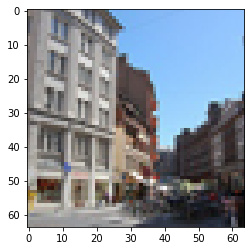

In [51]:
# 테스트 하기1

plt.imshow(X_test[10],cmap='Greys')
data = X_test[10].reshape([1,64,64,3])
print("Prediction : ",sess.run(tf.argmax(hypothesis,1),feed_dict={x:data}))

# '건물(buildings)'-> 0

Prediction :  [2]


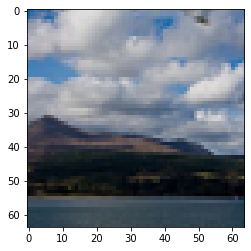

In [52]:
# 테스트 하기2

plt.imshow(X_test[14],cmap='Greys')
data = X_test[14].reshape([1,64,64,3])
print("Prediction : ",sess.run(tf.argmax(hypothesis,1),feed_dict={x:data}))

# '빙하(glacier)'-> 2

Prediction :  [1]


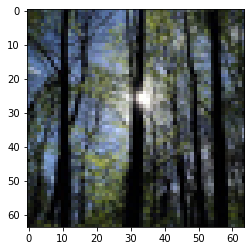

In [53]:
# 테스트 하기3

plt.imshow(X_test[20],cmap='Greys')
data = X_test[20].reshape([1,64,64,3])
print("Prediction : ",sess.run(tf.argmax(hypothesis,1),feed_dict={x:data}))

#  '숲(forest)'-> 1

prediction : [[0. 0. 0. 0. 0. 1.]]


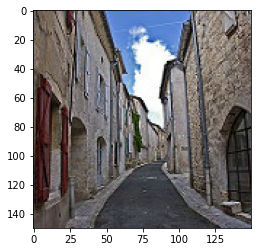

In [54]:
# 따로 이미지를 넣어서 예측하려면?

img = Image.open("D:/data/kaggle_seg/test_street_img.jpg")
plt.imshow(img)    
data = img.convert("RGB")    # 이미지에 대한 색상변경(삼원색 : RGB)
data = img.resize([64,64])    # 이미지크기 리사이즈
data = np.asarray(data)    # 컴퓨터가 작업할 수 있도록 array모습(값)으로 변경한다.
data.shape
data = data.reshape([1,64,64,3])    # 이미지형태 바꾸기
data.shape
p = sess.run(hypothesis,feed_dict={x:data})
print("prediction :",sess.run(tf.cast(p>0.5,dtype=tf.float32)))    # [0.0.0.0.0.1] =>  '거리(street)'-> 5